In [2]:
import pandas as pd

# Percorso del file CSV sul tuo Google Drive
percorso_del_file = '/content/drive/MyDrive/Dataset/top_songs_by_year.csv'

# Carica il dataset utilizzando pandas
dataset = pd.read_csv(percorso_del_file)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Creazione del DataFrame top_10
top_10 = pd.DataFrame()

# Filtra il DataFrame originale solo per gli anni compresi tra il 2005 e il 2023
dataset_filtrato = dataset[(dataset['year'] >= 2005) & (dataset['year'] <= 2023)]

# Itera per ogni anno
for anno in range(2005, 2024):
    # Seleziona le top 10 canzoni per l'anno corrente
    top_per_anno = dataset_filtrato[dataset_filtrato['year'] == anno].nlargest(10, 'views')

    # Aggiungi le top 10 canzoni per l'anno corrente al DataFrame top_10
    top_10 = pd.concat([top_10, top_per_anno])

# Salva il DataFrame top_10 nella cartella Dataset di Google Drive
top_10.to_csv('/content/drive/My Drive/Dataset/top_10.csv', index=False)


In [4]:
top_10

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
22621,Gold Digger,rap,Kanye West,2005,2044039,"{""Jamie Foxx""}",[Produced by Kanye West and Jon Brion]\n\n[Int...,1267,en,en,en
22622,Feel Good Inc.,rap,Gorillaz,2005,2017092,"{""De La Soul""}",[Intro: Maseo & 2-D]\nHahahahahahahahahahahaha...,21569,en,en,en
22623,Little Einsteins Theme Song,pop,Billy Straus,2005,1684132,{},"[Intro]\n5, 4, 3, 2, 1!\n\n[Chorus]\nWe're goi...",712367,en,en,en
22624,When Im Gone,rap,Eminem,2005,1494728,{},"[Intro]\nYeah, it's my life\nIn my own words, ...",1239,en,en,en
22625,SpongeBob SquarePants Theme Song,pop,SpongeBob SquarePants,2005,1289363,{},"[Intro: Painty the Pirate]\nAre you ready, kid...",93364,en,en,en
...,...,...,...,...,...,...,...,...,...,...,...
24426,She Dont Know,rap,Meek Mill,2023,22715,"{""Ty Dolla \\$ign""}",[Hook: Ty Dolla $ign]\nShe my fasho chick\nSti...,493982,en,en,en
24427,Just In Case,rap,Lil Peep,2023,21937,{},Lyrics from Snippets\n\n[Verse 1]\nAs I walk a...,5957991,en,en,en
24428,Dont Miss,rap,King Von,2023,17302,"{DQFrmDaO,""Youngin (O\\'Block)""}","Lyrics from Snippets\n\n[Intro: King Von, Youn...",6154819,en,en,en
24429,Neatly,rap,Drake,2023,17238,{},"[Intro]\nAyy, live from the mix, yeah\n\n[Chor...",7360921,en,en,en


In [5]:
percorso_del_modello = '/content/drive/MyDrive/Model/Copia di model_TXA.keras'
import tensorflow as tf

# Carica il modello
modello = tf.keras.models.load_model(percorso_del_modello)

In [7]:
modello.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1300641 (4.96 MB)
Trainable params: 1300641 (4.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Filtra il DataFrame top_10 eliminando le canzoni che non hanno 'en' nella colonna 'language_cld3'
top_10 = top_10[top_10['language_cld3'] == 'en']

# Visualizza il DataFrame risultante
top_10


,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
22621,Gold Digger,rap,Kanye West,2005,2044039,"{""Jamie Foxx""}",[Produced by Kanye West and Jon Brion]\n\n[Int...,1267,en,en,en
22622,Feel Good Inc.,rap,Gorillaz,2005,2017092,"{""De La Soul""}",[Intro: Maseo & 2-D]\nHahahahahahahahahahahaha...,21569,en,en,en
22623,Little Einsteins Theme Song,pop,Billy Straus,2005,1684132,{},"[Intro]\n5, 4, 3, 2, 1!\n\n[Chorus]\nWe're goi...",712367,en,en,en
22624,When Im Gone,rap,Eminem,2005,1494728,{},"[Intro]\nYeah, it's my life\nIn my own words, ...",1239,en,en,en
22625,SpongeBob SquarePants Theme Song,pop,SpongeBob SquarePants,2005,1289363,{},"[Intro: Painty the Pirate]\nAre you ready, kid...",93364,en,en,en
...,...,...,...,...,...,...,...,...,...,...,...
24426,She Dont Know,rap,Meek Mill,2023,22715,"{""Ty Dolla \\$ign""}",[Hook: Ty Dolla $ign]\nShe my fasho chick\nSti...,493982,en,en,en
24427,Just In Case,rap,Lil Peep,2023,21937,{},Lyrics from Snippets\n\n[Verse 1]\nAs I walk a...,5957991,en,en,en
24428,Dont Miss,rap,King Von,2023,17302,"{DQFrmDaO,""Youngin (O\\'Block)""}","Lyrics from Snippets\n\n[Intro: King Von, Youn...",6154819,en,en,en
24429,Neatly,rap,Drake,2023,17238,{},"[Intro]\nAyy, live from the mix, yeah\n\n[Chor...",7360921,en,en,en


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer

# Scarica le stopwords e i tokenizer se non sono già presenti
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Funzione per preprocessare il testo
def preprocess_text(text):
    # Rimuovi commenti tra parentesi quadre
    text = re.sub(r'\[.*?\]', '', text)

    # Rimuovi caratteri di interruzione di riga
    text = re.sub(r'\n', ' ', text)

    # Tokenizzazione delle parole
    tokens = word_tokenize(text.lower())

    # Rimuovi punteggiatura e stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Lemmatizzazione del testo
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Riunisci i token in un testo pulito
    clean_text = ' '.join(tokens)
    return clean_text

# Applica la funzione preprocess_text alla colonna 'lyrics' del DataFrame df
top_10['clean_lyrics'] = top_10['lyrics'].apply(preprocess_text)

# Numero massimo di feature da considerare
max_features = 10000

# Creazione del Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(top_10['clean_lyrics'])

# Convertire il testo preprocessato in sequenze di numeri interi
sequences = tokenizer.texts_to_sequences(top_10['clean_lyrics'])

# Lunghezza massima delle sequenze (puoi regolarla a tuo piacimento)
maxlen = 200

# Padding delle sequenze
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Visualizza il DataFrame aggiornato
print(top_10[['lyrics', 'clean_lyrics']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                  lyrics  \
22621  [Produced by Kanye West and Jon Brion]\n\n[Int...   
22622  [Intro: Maseo & 2-D]\nHahahahahahahahahahahaha...   
22623  [Intro]\n5, 4, 3, 2, 1!\n\n[Chorus]\nWe're goi...   
22624  [Intro]\nYeah, it's my life\nIn my own words, ...   
22625  [Intro: Painty the Pirate]\nAre you ready, kid...   
...                                                  ...   
24426  [Hook: Ty Dolla $ign]\nShe my fasho chick\nSti...   
24427  Lyrics from Snippets\n\n[Verse 1]\nAs I walk a...   
24428  Lyrics from Snippets\n\n[Intro: King Von, Youn...   
24429  [Intro]\nAyy, live from the mix, yeah\n\n[Chor...   
24430  [Intro: Drake]\n*Lighter flick*\nFeel like Tun...   

                                            clean_lyrics  
22621  take money need yeah triflin friend indeed oh ...  
22622  hahahahahahahahahahahahahahahaha feel good sha...  
22623  5 4 3 2 1 going trip favorite rocket ship zoom...  
22624  yeah life word guess ever loved some

<ipython-input-9-f1788e2a0913>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['clean_lyrics'] = top_10['lyrics'].apply(preprocess_text)


In [10]:
# Elimina la colonna 'lyrics'
top_10 = top_10.drop('lyrics', axis=1)

# Visualizza il DataFrame aggiornato
print(top_10)


                                  title  tag                 artist  year  \
22621                       Gold Digger  rap             Kanye West  2005   
22622                    Feel Good Inc.  rap               Gorillaz  2005   
22623       Little Einsteins Theme Song  pop           Billy Straus  2005   
22624                      When Im Gone  rap                 Eminem  2005   
22625  SpongeBob SquarePants Theme Song  pop  SpongeBob SquarePants  2005   
...                                 ...  ...                    ...   ...   
24426                     She Dont Know  rap              Meek Mill  2023   
24427                      Just In Case  rap               Lil Peep  2023   
24428                         Dont Miss  rap               King Von  2023   
24429                            Neatly  rap                  Drake  2023   
24430                  Escalate Quickly  rap      Benny the Butcher  2023   

         views                          features       id language_cld3  \


In [11]:

# Converti il testo preprocessato in sequenze di numeri interi con padding
sequences = tokenizer.texts_to_sequences(top_10['clean_lyrics'])
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Fai previsioni sulle nuove istanze
previsioni = modello.predict(padded_sequences)

# Aggiungi una nuova colonna 'prediction' al DataFrame con le previsioni
top_10['prediction'] = previsioni

# Visualizza il DataFrame con le colonne aggiornate
print(top_10[['clean_lyrics', 'prediction']])

6/6 [==============================] - 1s 55ms/step
                                            clean_lyrics  prediction
22621  take money need yeah triflin friend indeed oh ...    0.095975
22622  hahahahahahahahahahahahahahahaha feel good sha...    0.004786
22623  5 4 3 2 1 going trip favorite rocket ship zoom...    0.243326
22624  yeah life word guess ever loved someone much g...    0.628114
22625  ready kid aye aye captain ca hear aye aye capt...    0.344772
...                                                  ...         ...
24426  fasho chick still trying get chick might end c...    0.531172
24427  lyric snippet walk around place get used old f...    0.074629
24428  lyric snippet know let mac fly like nigga doe ...    0.450723
24429  ayy live mix yeah thing stay bussin like ak re...    0.147887
24430  lighter flick feel like tune iller illness peo...    0.114014

[188 rows x 2 columns]


In [13]:

valori_sotto_0_5 = top_10[top_10['prediction'] < 0.35]['prediction'].count()

# Visualizza il risultato
print(f"I valori al di sotto di 0.35 sono: {valori_sotto_0_5}")

I valori al di sotto di 0.35 sono: 143


In [14]:
top_10['sentiment_pred'] = top_10['prediction'].apply(lambda x: 0 if x < 0.35 else 1)

# Visualizza il DataFrame con la nuova colonna
print(top_10[['prediction', 'sentiment_pred']])

       prediction  sentiment_pred
22621    0.095975               0
22622    0.004786               0
22623    0.243326               0
22624    0.628114               1
22625    0.344772               0
...           ...             ...
24426    0.531172               1
24427    0.074629               0
24428    0.450723               1
24429    0.147887               0
24430    0.114014               0

[188 rows x 2 columns]


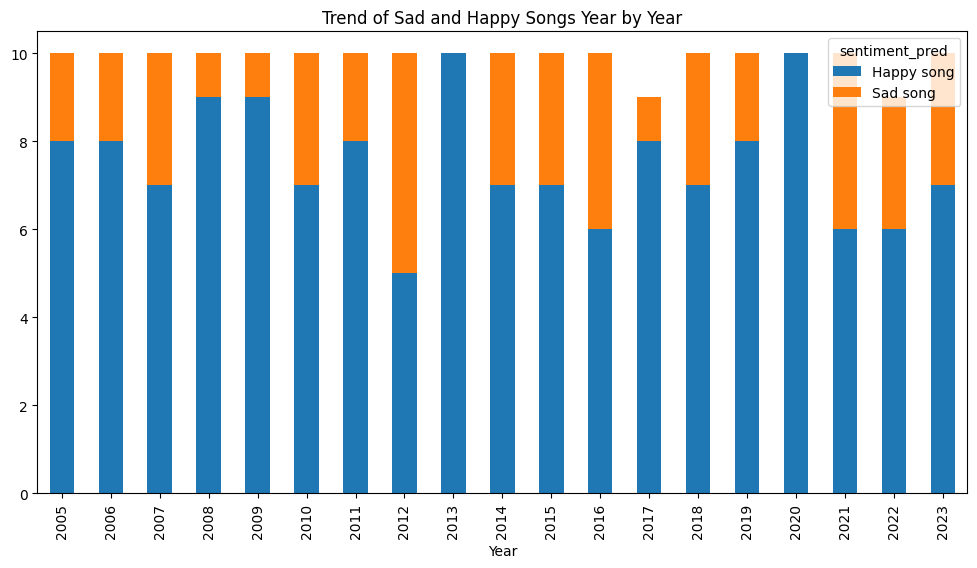

In [15]:
import matplotlib.pyplot as plt

# Filtra il DataFrame solo per gli anni compresi tra il 2005 e il 2024
dataset_filtrato = top_10[(top_10['year'] >= 2005) & (top_10['year'] <= 2024)]

# Raggruppa per anno e controlla la distribuzione di sentiment_pred
andamento_sentiment = dataset_filtrato.groupby(['year', 'sentiment_pred']).size().unstack(fill_value=0)

# Crea un grafico a barre
andamento_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Trend of Sad and Happy Songs Year by Year')
plt.xlabel('Year')
#plt.ylabel('Conteggio')
plt.legend(title='sentiment_pred', labels=['Happy song', 'Sad song'])
plt.show()


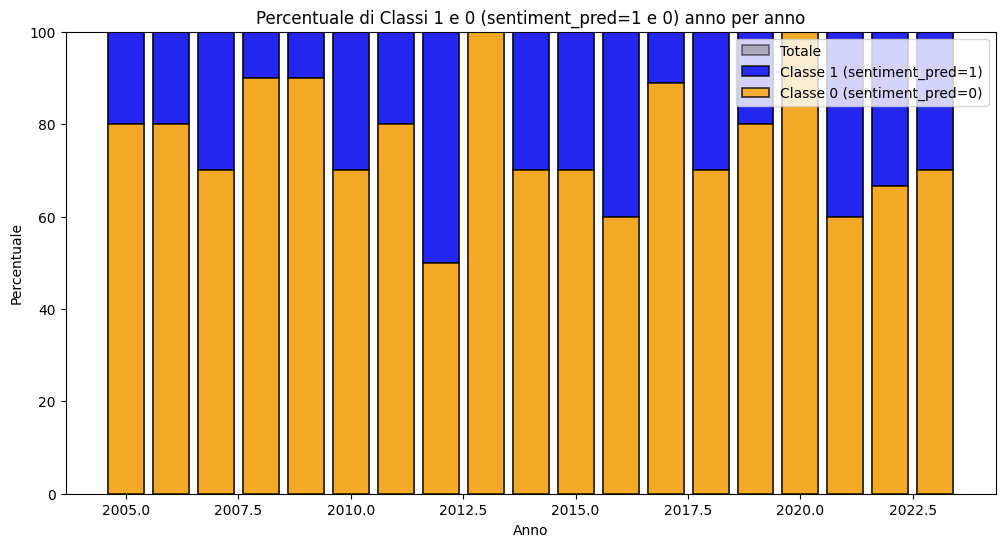

In [16]:
import matplotlib.pyplot as plt

# Filtra il DataFrame solo per gli anni compresi tra il 2005 e il 2024
dataset_filtrato = top_10[(top_10['year'] >= 2005) & (top_10['year'] <= 2024)]

# Calcola la percentuale di classe 1 e 0 per ogni anno
percentuale_classi = dataset_filtrato.groupby(['year', 'sentiment_pred']).size().unstack(fill_value=0)
percentuale_classi['percentuale_1'] = (percentuale_classi[1] / (percentuale_classi[0] + percentuale_classi[1])) * 100
percentuale_classi['percentuale_0'] = 100 - percentuale_classi['percentuale_1']

# Crea un grafico a barre
plt.figure(figsize=(12, 6))
plt.bar(percentuale_classi.index, [100] * len(percentuale_classi), alpha=0.5, label='Totale', color='grey', edgecolor='black', linewidth=1.2)
plt.bar(percentuale_classi.index, percentuale_classi['percentuale_1'], bottom=percentuale_classi['percentuale_0'], color='blue', alpha=0.8, label='Classe 1 (sentiment_pred=1)', edgecolor='black', linewidth=1.2)
plt.bar(percentuale_classi.index, percentuale_classi['percentuale_0'], color='orange', alpha=0.8, label='Classe 0 (sentiment_pred=0)', edgecolor='black', linewidth=1.2)

# Imposta i dettagli del grafico
plt.title('Percentuale di Classi 1 e 0 (sentiment_pred=1 e 0) anno per anno')
plt.xlabel('Anno')
plt.ylabel('Percentuale')
plt.legend()
plt.show()